In [40]:
import math
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import wget

In [41]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Dataset

Dataset from https://github.com/googlecreativelab/quickdraw-dataset

In [42]:
class_names = [ 'ant', 'bat', 'bear', 'bee', 'bird', 'butterfly', 'cat']

for category in class_names:
    print(category)
    #get.download(f'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/{category}.npy')


ant
bat
bear
bee
bird
butterfly
cat


In [43]:
def normalize(n):
    images = tf.cast(n, tf.float32)
    images /= 255
    return tf.reshape(images, (28,28, 1))

ant = list(map(normalize, np.load('ant.npy')[:10000] )), [class_names.index('ant')] * 10000
bat = list(map(normalize, np.load('bat.npy')[:10000] )), [class_names.index('bat')] * 10000
bear = list(map(normalize, np.load('bear.npy')[:10000] )), [class_names.index('bear')] * 10000
bee = list(map(normalize, np.load('bee.npy')[:10000] )), [class_names.index('bee')] * 10000
bird = list(map(normalize, np.load('bird.npy')[:10000] )), [class_names.index('bird')] * 10000
butterfly = list(map(normalize, np.load('butterfly.npy')[:10000] )), [class_names.index('butterfly')] * 10000
cat = list(map(normalize, np.load('cat.npy')[:10000] )), [class_names.index('cat')] * 10000

### Explore the data

In [44]:
train_features_dataset = []
train_labels_dataset = []
test_features_dataset = []
test_labels_dataset = []

for animal_dataset in [ant, bat, bear, bee, bird, butterfly, cat]:
    features, labels = animal_dataset
    train_features_dataset.extend(features[:9000])
    train_labels_dataset.extend(labels[:9000])
    test_features_dataset.extend(features[9000:])
    test_labels_dataset.extend(labels[9000:])

train_dataset = tf.data.Dataset.from_tensor_slices((train_features_dataset, train_labels_dataset))
train_dataset = train_dataset.shuffle(len(train_features_dataset))
test_dataset  = tf.data.Dataset.from_tensor_slices((test_features_dataset , test_labels_dataset ))
test_dataset = test_dataset.shuffle(len(test_features_dataset))

train_dataset = train_dataset.cache() 
test_dataset  = test_dataset.cache()



(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)


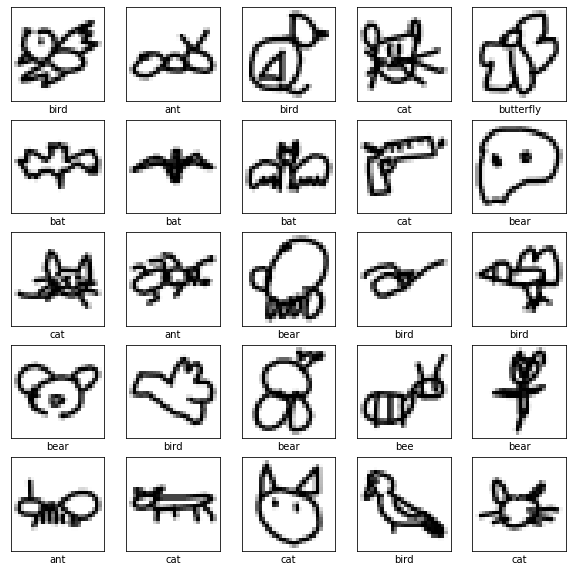

In [45]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in train_dataset.take(25):
    print(image.shape)
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [46]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu, input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(7)
])

In [47]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [48]:
BATCH_SIZE = 32
num_examples = 6300
train_dataset = train_dataset.cache().repeat().batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

for (image, label) in train_dataset.take(1):
    print(image.shape)

for (image, label) in test_dataset.take(1):
    print(image.shape)


(32, 28, 28, 1)
(32, 28, 28, 1)


In [49]:
model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_examples/BATCH_SIZE))

Train for 197 steps
Epoch 1/10
197/197 [==============================] - 1s 6ms/step - loss: 1.2281 - accuracy: 0.5668
Epoch 2/10
197/197 [==============================] - 1s 3ms/step - loss: 0.8054 - accuracy: 0.7314
Epoch 3/10
197/197 [==============================] - 1s 3ms/step - loss: 0.7208 - accuracy: 0.7684
Epoch 4/10
197/197 [==============================] - 1s 3ms/step - loss: 0.6234 - accuracy: 0.8001
Epoch 5/10
197/197 [==============================] - 1s 4ms/step - loss: 0.6434 - accuracy: 0.7917
Epoch 6/10
197/197 [==============================] - 1s 4ms/step - loss: 0.5872 - accuracy: 0.8058
Epoch 7/10
197/197 [==============================] - 1s 4ms/step - loss: 0.5546 - accuracy: 0.8173
Epoch 8/10
197/197 [==============================] - 1s 3ms/step - loss: 0.5631 - accuracy: 0.8154
Epoch 9/10
197/197 [==============================] - 1s 3ms/step - loss: 0.5298 - accuracy: 0.8238
Epoch 10/10
197/197 [==============================] - 1s 3ms/step - loss: 0.522

In [50]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(len(test_features_dataset)/32))
print('Accuracy on test dataset:', test_accuracy)

219/219 [==============================] - 0s 2ms/step - loss: 0.5077 - accuracy: 0.8311
Accuracy on test dataset: 0.83114284


In [51]:
tf.saved_model.save(model, '../server/model/catchai/')

INFO:tensorflow:Assets written to: ../server/model/catchai/assets


In [52]:
for test_images, test_labels in train_dataset.take(1):
    print(test_images.shape)
    test_dataset = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

(32, 28, 28, 1)


In [53]:
predictions.shape

(32, 7)

In [54]:
predictions[0]

array([ 0.49696383,  1.0525733 ,  0.9171245 , -2.0934994 , -1.9887815 ,
       -3.9184356 ,  6.1060767 ], dtype=float32)

In [55]:
np.argmax(predictions[0])

6

In [56]:
test_labels[0]

6

In [61]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(7), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

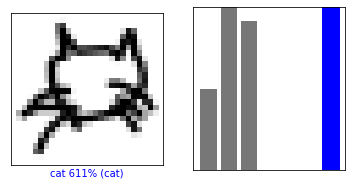

In [62]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

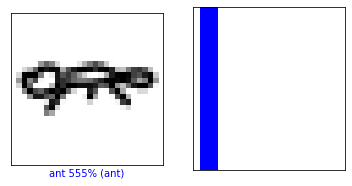

In [63]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

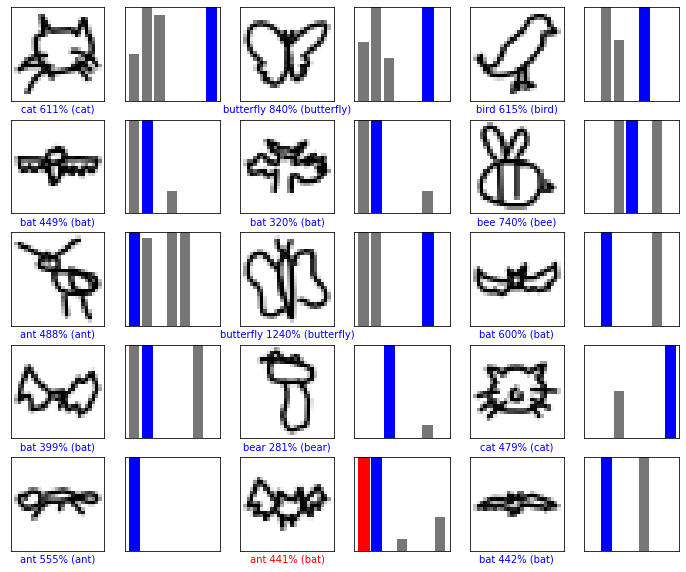

In [64]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [65]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [66]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [67]:
predictions_single = model.predict(img)

print(predictions_single)

[[ 0.49696395  1.052573    0.9171246  -2.0934994  -1.9887813  -3.9184356
   6.1060777 ]]


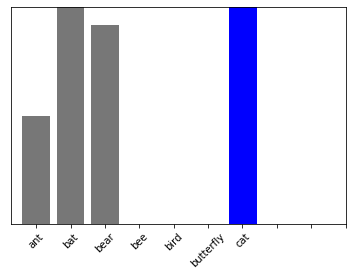

In [68]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [69]:
np.argmax(predictions_single[0])

6